In [1]:
%cd '/UltimeTradingBot/Crypto_backtest_tools'
WINDOW_SIZE=30
BUY_PERCENT=0.8
MAX_FORCAST_SIZE=10
VERSION=1
TESTING_MOD=True
JUST_IMPORT_DATA=True
#Normalization_File='w15_NoVol_Normalization.json'
#Model_FileName='w15_NoVol_XcryptoAi_model.hdf5'
ALLHIST_FILE='Results_history.json'
DATA_DIR='/UltimeTradingBot/Data/'
FIRST_NORM_FLAG=True
DATA_DIR='/UltimeTradingBot/Data'
Normalization_File=f'{DATA_DIR}/tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Norm_v{VERSION}.json'
Model_FileName=f'{DATA_DIR}/tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model_v{VERSION}.hdf5'
DATA_FILE=f'{DATA_DIR}/tp{int(BUY_PERCENT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Data_v{VERSION}.csv'
window=WINDOW_SIZE
SELL_PERCENT=0.30
NORM_FILE=Normalization_File
MODEL_FILE=Model_FileName
Px=6
BUFFER_SIZE=200000*Px
SAMPLE_SIZE=4000*Px

#DATA_FILE=DATA_DIR+'w'+str(WINDOW_SIZE)+'_EXTData.csv'



/UltimeTradingBot/Crypto_backtest_tools


In [2]:


import sys
sys.path.append('/UltimeTradingBot/Crypto_backtest_tools')

from utilities.get_data import get_historical_from_db
from utilities.backtesting import basic_single_asset_backtest, plot_wallet_vs_asset, get_metrics
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import json
import numpy as np
import random
from sklearn.utils import shuffle
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import os
pd.options.mode.chained_assignment = None  # default='warn'
import os
import gc
import tensorflow as tf
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')


2022-10-05 06:54:38.719147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 06:54:38.870329: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
import gc
gc.collect()    

import warnings
warnings.filterwarnings('ignore')
PRERR=False
def prerr(err):
    if PRERR:
        print("\033[0;31m Error in "+str(sys._getframe().f_code.co_name) +" \033[0;33m"+str(err))

PDEBUG=True
def pdebug(err):
    if PDEBUG:
        print("\033[0;31m Error in "+str(sys._getframe().f_code.co_name) +" \033[0;33m"+str(err))

In [ ]:
MetaData = pd.read_csv("../Data/Metadata.csv",index_col=0)
MetaData

In [4]:
#MetaData=get_crypto_metadata(Binance_USDT_HALAL)
#MetaData = pd.read_csv("../Data/MetaData.csv")
#df = pd.read_csv(DATA_FILE,index_col=0,nrows=1000000)
df = pd.read_csv(DATA_FILE,index_col=0)

In [ ]:
#df=df.drop(columns="sell")
#df=df.drop(columns=["Unnamed: 0"])
#df.to_csv('D:/+DATA+/allok_w15_nosell.csv')

In [6]:
sys.getsizeof(df)/(1024**2)

6992.201370239258

## Testing impoted DATA

In [7]:
try:
    df=df.drop(columns=["sell",'bs'])
except:
    print("no bs or sell")

no bs or sell


In [8]:
df[df.isnull().any(axis=1)]

,price,high-1,low-1,close-1,volume-1,high-2,low-2,close-2,volume-2,high-3,...,BTC_volume-29_5min,BTC_high-30_5min,BTC_low-30_5min,BTC_close-30_5min,BTC_volume-30_5min,day,hour,minute,lunch_day,buy


In [ ]:
# VolRemover=["volume","volume-1","BTC_volume-1"]
# for key in df.keys():
#     if key.find("volume-1_") != -1 :
#         VolRemover.append(key)

#     df=pd.concat([df1,df0],axis=0).drop(columns=VolRemover)

# high_weight=3
# df["high"]=(df["open"]+high_weight*df["high"]+df["low"]+df["close"])/(3+high_weight)
# df.rename(columns={"high":"price"},inplace = True)
# df["BTC_high"]=(df["BTC_open"]+high_weight*df["BTC_high"]+df["BTC_low"]+df["BTC_close"])/(3+high_weight)
# df.rename(columns={"BTC_high":"BTC_price"},inplace = True)
# df2=df.drop(columns=["BTC_open","BTC_low","BTC_close","open","low","close"])
# del(df)
# df=df2
# #del(df2)
# for key in df.keys():
#     if key.find("BTC")!=-1 and (key.find("open")!=-1 or
#     key.find("high")!=-1 or key.find("low")!=-1 or key.find("close")!=-1):
#         df[key]=(df["BTC_price"]-df[key])/df["BTC_price"]
#     if key.find("BTC")==-1 and (key.find("open")!=-1 or
#     key.find("high")!=-1 or key.find("low")!=-1 or key.find("close")!=-1):
#         df[key]=(df["price"]-df[key])/df["price"]

# df1=df[df["buy"]==1]
# df0=df[df["buy"]==0].iloc[0:len(df1)]
# #del(df)




In [ ]:
#import gc
#df=df.iloc[0:int(len(df)/3)]
gc.collect()
# df=df.reindex(np.random.permutation(df.index))
# df=df.reindex(np.random.permutation(df.index))
# sys.getsizeof(df)/(1024**2)
df


### Remove volumes

In [ ]:
# try:
#     VolRemover=["volume","volume-1","BTC_volume-1","BTC_volume"]
#     for key in df.keys():
#         if key.find("volume-1_") != -1 :
#             VolRemover.append(key)

#         df=df.drop(columns=VolRemover)
# except:
#     try:
#         df=df.drop(columns=["BTC_volume"])
#     except:

#         print("no veol")


Cheking null values

In [ ]:
#print(df[df.isnull().any(axis=1)])
df[df.isnull().any(axis=1)]

In [ ]:
df=df.fillna(0)

checking keys

In [9]:
for k in df.keys():
    if k.find("volume") != -1 :print(k ,end="|")

volume-1|volume-2|volume-3|volume-4|volume-5|volume-6|volume-7|volume-8|volume-9|volume-10|volume-11|volume-12|volume-13|volume-14|volume-15|volume-16|volume-17|volume-18|volume-19|volume-20|volume-21|volume-22|volume-23|volume-24|volume-25|volume-26|volume-27|volume-28|volume-29|volume-30|volume-1_day|volume-2_day|volume-3_day|volume-4_day|volume-5_day|volume-6_day|volume-7_day|volume-8_day|volume-9_day|volume-10_day|volume-11_day|volume-12_day|volume-13_day|volume-14_day|volume-15_day|volume-16_day|volume-17_day|volume-18_day|volume-19_day|volume-20_day|volume-21_day|volume-22_day|volume-23_day|volume-24_day|volume-25_day|volume-26_day|volume-27_day|volume-28_day|volume-29_day|volume-30_day|volume-1_hour|volume-2_hour|volume-3_hour|volume-4_hour|volume-5_hour|volume-6_hour|volume-7_hour|volume-8_hour|volume-9_hour|volume-10_hour|volume-11_hour|volume-12_hour|volume-13_hour|volume-14_hour|volume-15_hour|volume-16_hour|volume-17_hour|volume-18_hour|volume-19_hour|volume-20_hour|volume-

# starting numpy process

## convert Pandas DataFrame to numpy object

In [10]:

dt = df.to_numpy()
dt


array([[ 2.81033333e-05, -2.37219784e-03,  8.30269244e-04, ...,
         3.30000000e+01, -4.95000000e+02,  0.00000000e+00],
       [ 3.09396667e+00, -3.66304313e-04,  1.31438606e-03, ...,
         4.90000000e+01,  3.48000000e+02,  0.00000000e+00],
       [ 2.99150000e-01,  1.50426208e-03,  1.50426208e-03, ...,
         1.00000000e+00,  5.80000000e+02,  0.00000000e+00],
       ...,
       [ 1.61766667e+01, -2.06058108e-04,  2.88481352e-03, ...,
         1.00000000e+00, -3.64000000e+02,  0.00000000e+00],
       [ 4.90831667e+00,  9.86421007e-03,  1.53650776e-02, ...,
         1.70000000e+01, -4.39000000e+02,  0.00000000e+00],
       [ 1.97813333e+00, -1.65138851e-03, -1.24696684e-03, ...,
         3.70000000e+01, -6.59000000e+02,  1.00000000e+00]])

In [ ]:
#del(df)

In [11]:
dt.shape

(758677, 1207)

In [12]:
dt[3927,-1]

0.0

### Shuffle the rows Again

In [ ]:
#np.random.shuffle(dt)

In [ ]:
#sys.getsizeof(dt)/(1024**2)

In [ ]:
#np.savetxt('np_shuffled_cryptodata_w15.csv', dt ,delimiter=',')



In [ ]:
#dt=np.genfromtxt('np_shuffled_cryptodata_w15.csv', delimiter=',')

In [13]:
index_20percent= int(0.4*len(dt[:,0]))
print(index_20percent)

303470


In [14]:
XVALIDATION= dt[:index_20percent, :-1]
YVALIDATION= dt[:index_20percent,-1]


In [15]:
XTRAIN= dt[index_20percent:, 0:-1]
YTRAIN= dt[index_20percent:,-1]

## Normalization

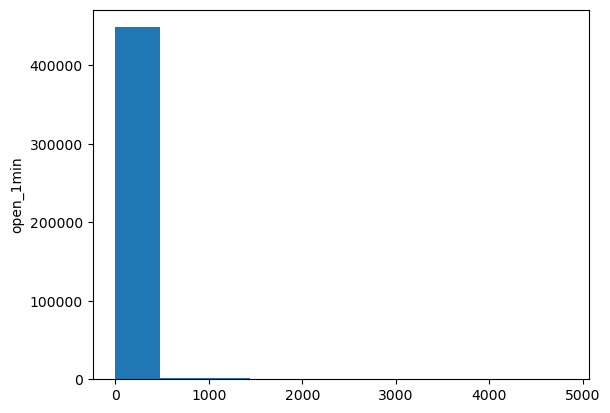

In [16]:
plt.hist(XTRAIN[:,0])
plt.ylabel("open_1min")
plt.show()

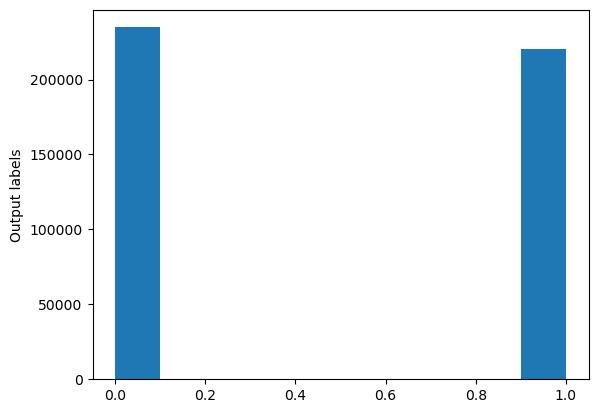

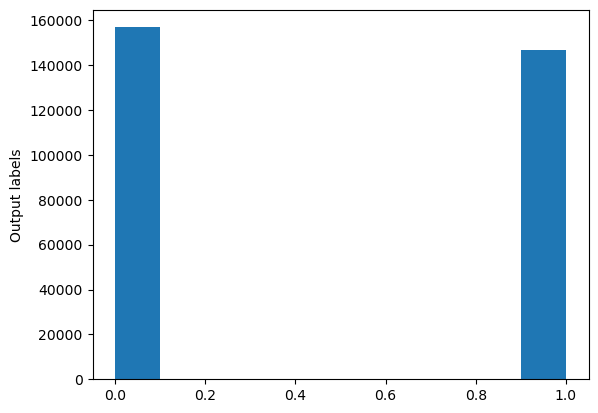

In [17]:
plt.hist(YTRAIN)
plt.ylabel("Output labels")
plt.show()

plt.hist(YVALIDATION)
plt.ylabel("Output labels")
plt.show()

In [ ]:
import gc
gc.collect()

Tenderalization (mean normalization)

In [ ]:
Normalization=None
def normalize(dataset,file=Normalization_File):
    global Normalization
    try:
        N=Normalization
    except:
        Normalization=None
    if(Normalization==None):
        #print('Loading normalization from file')
        with open(file) as json_file:
            Normalization = json.load(json_file)
    else:
        #print('normalization is loaded')
        pass

    mean=np.array(Normalization["mean"])
    std=np.array(Normalization["std"])
    dataset -= mean 
    dataset /= std
    return(dataset)

In [ ]:
# Normalization
# with open('w15_NoVol_Normalization.json') as json_file:
#             Normalization = json.load(json_file)
# np.array(Normalization["mean"])
# mean=np.array(Normalization["mean"])


In [ ]:
# mean=np.array(Normalization["mean"])
# std=np.array(Normalization["std"])


In [ ]:
#std.shape

In [ ]:
del(df)
gc.collect()

mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)



XTRAIN -= mean 
XTRAIN /= std

XVALIDATION -=mean
XVALIDATION /= std



In [ ]:

try:
    Normalization={"mean":mean.tolist(),"std":std.tolist()}
    with open(Normalization_File, 'w+') as fp:
                json.dump(Normalization, fp,  indent=4)
except:
    print("error juppiter")

In [ ]:
plt.hist(XTRAIN[:,0])
plt.ylabel("open column")
plt.show()

In [ ]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)

# Neural network model

### Model Generator

In [ ]:
IN_DIM=len(XTRAIN[0,:])

#code genrator
global All_Hist
try:
    with open('Results_history.json') as json_file:
        All_Hist = json.load(json_file)
except:
    All_Hist={}

try:
    All_Hist.pop('1e-06')
except:
    print(All_Hist)


In [ ]:


def auto_code_gen():
    NumLayer=random.randint(1, 5)
    InpLay=int(random.randint(1, max(2,int(NumLayer/random.randint(3,NumLayer+4)+4))))
    act_func=['tanh','relu','sigmoid','softmax','softplus']
    dropout_val=[0.2,0.3,0.4,0.5,0.6,0.7]
    decreaser=1
    IN_DIM=len(XTRAIN[0,:])
    code="model.add(Dense(int(IN_DIM/"+str(InpLay)+"),input_dim=IN_DIM,activation=\'"+random.choice(act_func)+"\'))\n"
    for i in range(0,NumLayer):
        code+='model.add(Dense(int(IN_DIM/'+str(random.randint(1,max(2,(i+1)*2)+1))+'),activation=\''+random.choice(act_func)+'\'))\n'
        if random.choice([True,False]):
            code+='model.add(Dropout('+str(random.choice(dropout_val))+'))\n'
    code+='model.add(Dense(1,activation=\'sigmoid\'))'
    return code

def model_tester(max_tests=500): 
    code=""
    for c in range(1,max_tests+1):
        model = Sequential()
        if code  in All_Hist.values(): break
        code=auto_code_gen()
        exec(code)
        print(model.summary())
        #model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        callbacks_a = ModelCheckpoint(filepath ='X004_w15_cryptoAi_model.hdf5',monitor ='val_accuracy',save_best_only = True, save_weights = True)
        callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=20,verbose=1)
        history = model.fit(XTRAIN,
                        YTRAIN,
                        validation_data=(XVALIDATION,YVALIDATION),
                        epochs=1200,
                        batch_size=5000,
                        callbacks=[callbacks_a,callbacks_b])

        print('##########################################################################')
        print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
        All_Hist[max(history.history['val_accuracy'])]=code
        with open('Results_history.json', 'w') as fp:
            json.dump(All_Hist, fp,  indent=4)


#model_tester(max_tests=500)

The neural network architecture:
- layer 1 : 764 neurons
- layer 2 : 8 neurons
- layer 3 : neurons 

## Model Test

## Compile the model 

In [ ]:
model = Sequential()
model = Sequential()
model.add(Dense(int(IN_DIM/2),input_dim=IN_DIM,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(int(IN_DIM/6),activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(int(IN_DIM/12),activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath=Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=20,verbose=1)
history = model.fit(XTRAIN,
                YTRAIN,
                validation_data=(XVALIDATION,YVALIDATION),
                epochs=1200,
                batch_size=5000,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")


In [ ]:
accuracy = model.evaluate(dt[:,:-1], dt[:,-1])


### Use the model

In [ ]:

# make probability predictions with the model
predictions = model.predict(XVALIDATION)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [ ]:
rounded[1002]

In [ ]:
YVALIDATION[1002]

In [ ]:
def Buy_Dessision(input):
    predictions = model.predict(XVALIDATION)
    rounded = [round(x[0]) for x in predictions]